# Librerias necesarias

In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    SGDRegressor,
    LogisticRegression
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
     mean_squared_error, 
     r2_score, 
     mean_absolute_error,
     classification_report, 
     confusion_matrix,
     ConfusionMatrixDisplay,
     balanced_accuracy_score, 
     log_loss,
     roc_curve, 
     roc_auc_score, 
     auc,
     accuracy_score
)
import shap

# Carga de datos

In [324]:
file_path = "weatherAUS.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

# Limpieza y transformacion de datos

1) Elimino la columna 'Unnamed: 0' porque es un indice que esta de mas.
2) Segun el enunciado, unicamente nos interesan las ciudades Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport por lo que filtro el DataSet para quedarme unicamente con los datos de dichas ciudades.

3) Elimino de una vez la variable 'Location' debido a que el enunicado declara que se pueden considerar como una unica ubicacion.

In [325]:
df = df.drop("Unnamed: 0", axis=1)
ciudades = [
    " Adelaide",
    "Canberra",
    "Cobar",
    "Dartmoor",
    "Melbourne",
    "MelbourneAirport",
    "MountGambier",
    "Sydney",
    "SydneyAirport",
]
df = df[df["Location"].isin(ciudades)]
df = df.drop("Location", axis=1)

---

## Split de datos

Hago el split en df_train y df_test a partir de una fecha determinada para dejar aproximadamente un 80% de mis datos en Train y 20% en Test.

La fecha mas antigua del dataset es 01-11-2007 y la mas reciente es 24-06-2017. 
Decido hacer el split de datos a partir de la fecha 01-01-2016, concentrando aproximadamente el 80% de datos para el conjunto de entrenamiento, y el 20% restante para el conjunto de test.

In [326]:
df["Date"] = pd.to_datetime(df["Date"])

fecha_mas_antigua = df['Date'].min()
fecha_mas_reciente = df['Date'].max()

print(f'Fecha mas antigua: {fecha_mas_antigua}')
print(f'Fecha mas reciente: {fecha_mas_reciente}')

Fecha mas antigua: 2007-11-01 00:00:00
Fecha mas reciente: 2017-06-24 00:00:00


In [327]:
fecha_limite = "2016-01-01"

df_train = df[df["Date"] < fecha_limite]

df_test = df[df["Date"] >= fecha_limite]

print("Tamaño del conjunto de entrenamiento:", len(df_train))
print("Tamaño del conjunto de prueba:", len(df_test))

Tamaño del conjunto de entrenamiento: 20713
Tamaño del conjunto de prueba: 4328


---

## Tipos de datos y valores nulos

Observo una descripcion, el tipo de dato y los valores nulos de cada variable.

In [328]:
df_train.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,20713,20271.000000,20284.000000,19981.000000,19461.000000,17369.000000,19159.000000,20366.000000,20382.000000,20023.000000,20068.000000,20008.000000,20016.000000,15867.000000,15593.000000,20258.000000,20265.000000,19981.000000
mean,2012-04-24 22:18:46.596823040,10.955991,21.647510,2.062940,4.675207,6.809471,42.885015,15.986252,20.811500,69.661489,50.862916,1018.303134,1016.178991,4.572761,4.687616,15.168388,20.142990,2.061859
min,2007-11-01 00:00:00,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,5.000000,1.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,2010-06-10 00:00:00,7.100000,16.500000,0.000000,2.200000,3.700000,33.000000,9.000000,15.000000,58.000000,37.000000,1013.400000,1011.300000,1.000000,2.000000,11.100000,15.200000,0.000000
50%,2012-04-17 00:00:00,10.600000,20.800000,0.000000,4.000000,7.300000,41.000000,15.000000,20.000000,71.000000,50.000000,1018.500000,1016.300000,6.000000,6.000000,14.700000,19.300000,0.000000
75%,2014-03-24 00:00:00,14.900000,25.800000,1.000000,6.400000,10.000000,52.000000,20.000000,26.000000,83.000000,64.000000,1023.400000,1021.200000,7.000000,7.000000,18.900000,24.200000,1.000000
max,2015-12-31 00:00:00,30.500000,46.800000,119.400000,64.800000,14.300000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.100000,119.400000
std,NaN,5.741061,6.573869,6.446013,3.401770,3.853102,14.462229,9.778937,9.218541,18.437859,20.014269,7.370028,7.236090,2.814362,2.619433,5.655393,6.410891,6.445336


In [329]:
df_train.dtypes

Date                datetime64[ns]
MinTemp                    float64
MaxTemp                    float64
Rainfall                   float64
Evaporation                float64
Sunshine                   float64
WindGustDir                 object
WindGustSpeed              float64
WindDir9am                  object
WindDir3pm                  object
WindSpeed9am               float64
WindSpeed3pm               float64
Humidity9am                float64
Humidity3pm                float64
Pressure9am                float64
Pressure3pm                float64
Cloud9am                   float64
Cloud3pm                   float64
Temp9am                    float64
Temp3pm                    float64
RainToday                   object
RainTomorrow                object
RainfallTomorrow           float64
dtype: object

In [330]:
df_train.isnull().sum()

Date                   0
MinTemp              442
MaxTemp              429
Rainfall             732
Evaporation         1252
Sunshine            3344
WindGustDir         1557
WindGustSpeed       1554
WindDir9am          1229
WindDir3pm           401
WindSpeed9am         347
WindSpeed3pm         331
Humidity9am          690
Humidity3pm          645
Pressure9am          705
Pressure3pm          697
Cloud9am            4846
Cloud3pm            5120
Temp9am              455
Temp3pm              448
RainToday            732
RainTomorrow         732
RainfallTomorrow     732
dtype: int64

Observo que las variables 'RainToday', 'RainTomorrow' y 'RainfallTomorrow' tienen igual cantidad de valores nulos.

Me fijo en que registros las tres columnas son nulas, son unicamente 570 registros, lo que representa aproximadamente un 2% de mi dataset, por lo que decido eliminarlos.

In [331]:
# Registros de df_train donde las 3 variables son Nulas.
df_train[
    df_train["RainToday"].isnull()
    & df_train["RainTomorrow"].isnull()
    & df_train["RainfallTomorrow"].isnull()
]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6967,2011-08-09,7.4,13.0,NaN,NaN,NaN,WNW,28.0,WSW,W,...,51.0,1013.0,1011.1,8.0,7.0,8.2,12.5,NaN,NaN,NaN
6968,2011-08-10,6.5,16.7,NaN,NaN,NaN,WSW,26.0,NNW,W,...,64.0,1010.5,1007.7,NaN,8.0,11.4,12.7,NaN,NaN,NaN
7445,2012-11-29,23.9,41.7,NaN,11.2,NaN,SW,50.0,NNE,NNW,...,16.0,1011.5,1008.4,1.0,4.0,29.8,40.9,NaN,NaN,NaN
32570,2014-11-28,NaN,23.3,NaN,3.4,11.9,ENE,37.0,E,E,...,46.0,NaN,1021.3,3.0,2.0,NaN,22.3,NaN,NaN,NaN
46854,2011-06-04,4.4,13.2,NaN,2.2,0.6,NaN,NaN,NNW,WNW,...,58.0,NaN,NaN,8.0,NaN,10.6,11.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81030,2009-02-28,NaN,NaN,NaN,8.0,4.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81031,2009-03-01,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81032,2009-03-02,NaN,NaN,NaN,3.8,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81033,2009-03-03,NaN,NaN,NaN,8.0,1.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
df_train = df_train[
    ~(
        df_train["RainToday"].isnull()
        & df_train["RainTomorrow"].isnull()
        & df_train["RainfallTomorrow"].isnull()
    )
]

In [333]:
print("Nulos RainToday:", df_train["RainToday"].isnull().sum())
print("Nulos RainTomorrow:", df_train["RainTomorrow"].isnull().sum())
print("Nulos RainfallTomorrow:", df_train["RainfallTomorrow"].isnull().sum())

Nulos RainToday: 162
Nulos RainTomorrow: 162
Nulos RainfallTomorrow: 162


En cada variable quedaron un total de 162 nulos, vuelvo a observar pero esta vez de a pares, en que variables hay nulos a la vez.

In [334]:
print(
    "Nulos RainToday y RainTomorrow:",
    (df_train["RainToday"].isnull() & df_train["RainTomorrow"].isnull()).sum(),
)
print(
    "Nulos RainToday y RainfallTomorrow:",
    (df_train["RainToday"].isnull() & df_train["RainfallTomorrow"].isnull()).sum(),
)
print(
    "Nulos RainTomorrow y RainfallTomorrow:",
    (df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull()).sum(),
)

Nulos RainToday y RainTomorrow: 0
Nulos RainToday y RainfallTomorrow: 0
Nulos RainTomorrow y RainfallTomorrow: 162


Procedo a eliminar los registros nulos de las variables 'RainTomorrow' y 'RainfallTomorrow'.

In [335]:
df_train[df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull()]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6292,2009-09-03,12.0,23.8,0.0,6.4,NaN,N,41.0,NNE,NNW,...,38.0,1016.3,1013.3,7.0,3.0,17.1,22.2,No,NaN,NaN
6966,2011-08-08,3.5,16.0,0.0,4.6,NaN,W,44.0,W,W,...,39.0,1014.7,1011.7,7.0,5.0,9.1,15.4,No,NaN,NaN
7444,2012-11-28,19.5,38.0,2.0,NaN,NaN,NaN,NaN,NaN,NNW,...,25.0,NaN,1010.0,2.0,2.0,26.6,36.6,Yes,NaN,NaN
31035,2010-06-18,9.8,18.0,0.6,3.0,9.6,NaN,NaN,W,W,...,39.0,1017.1,1015.5,NaN,NaN,12.1,17.8,No,NaN,NaN
31148,2010-10-09,15.8,18.9,0.0,5.2,0.0,ESE,31.0,ESE,ENE,...,55.0,1026.4,1025.3,NaN,NaN,17.0,18.3,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69427,2014-11-24,15.7,19.9,2.0,7.8,0.4,N,63.0,WSW,SW,...,88.0,1009.1,1006.5,7.0,NaN,17.5,18.3,Yes,NaN,NaN
69437,2014-12-04,17.6,27.7,8.6,1.8,11.8,SSE,35.0,SE,SSE,...,54.0,1010.2,1008.1,7.0,6.0,20.8,25.9,Yes,NaN,NaN
69453,2014-12-20,12.6,23.8,0.0,5.4,13.4,S,35.0,SSW,ESE,...,41.0,1019.3,1017.5,NaN,NaN,16.4,22.4,No,NaN,NaN
69470,2015-01-06,17.6,NaN,0.0,6.6,11.6,S,35.0,ENE,SSE,...,NaN,1020.2,NaN,3.0,NaN,20.7,NaN,No,NaN,NaN


In [336]:
df_train = df_train[
    ~(df_train["RainTomorrow"].isnull() & df_train["RainfallTomorrow"].isnull())
]

## Correlacion de variables

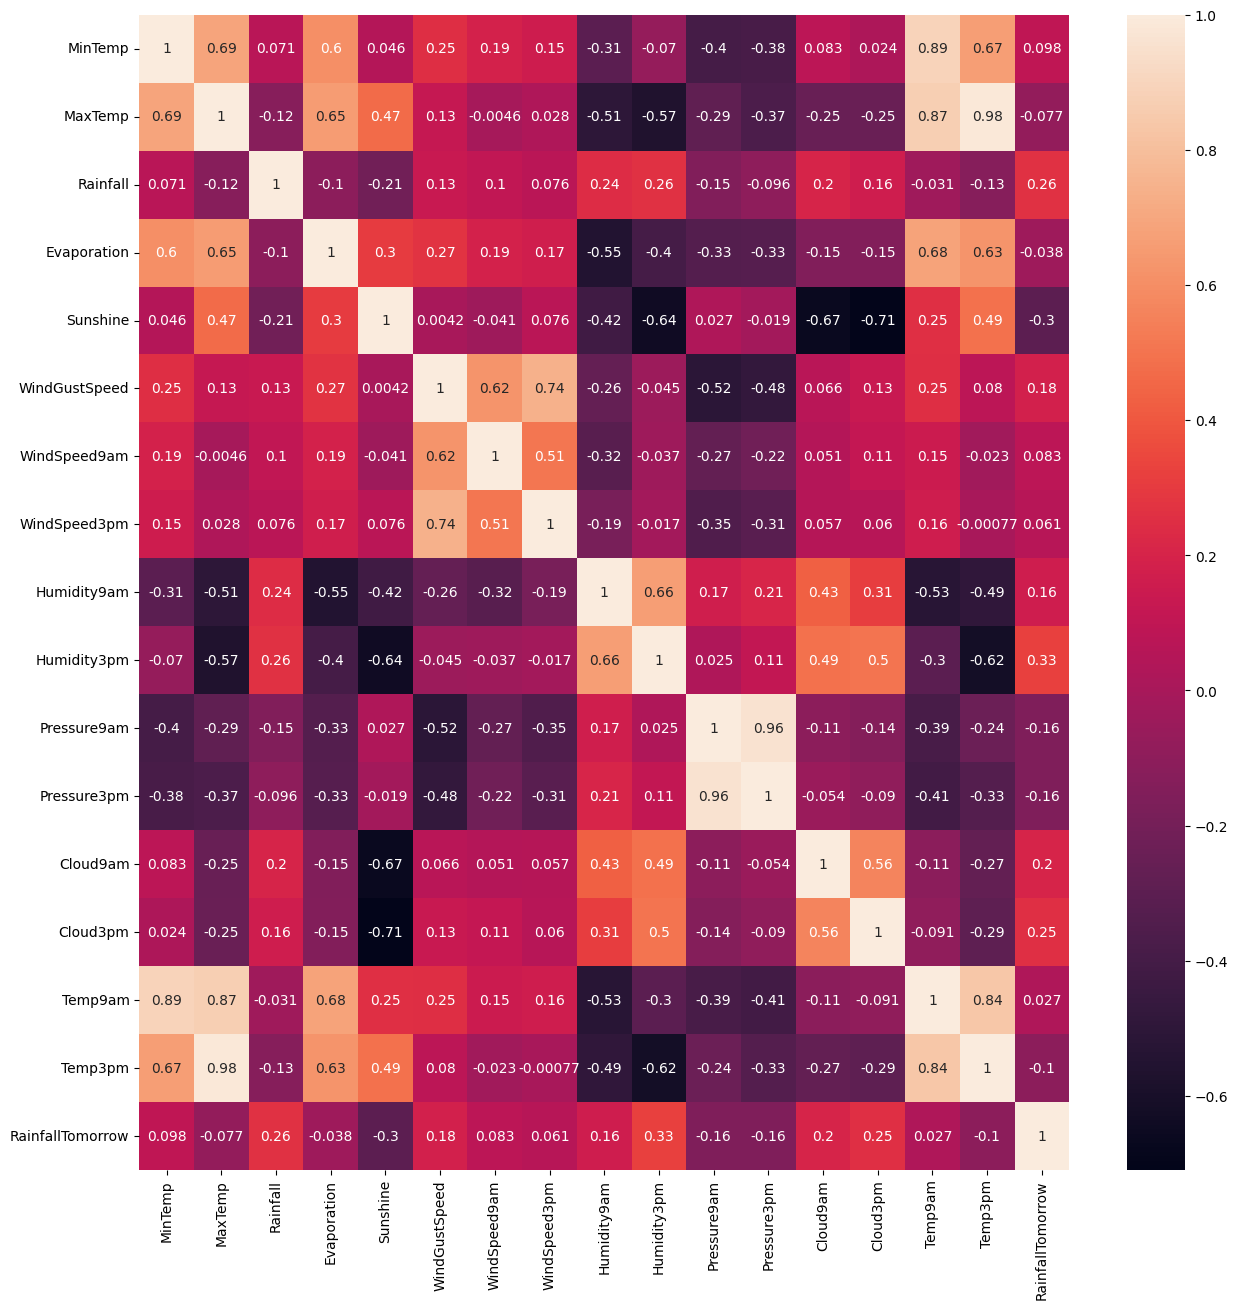

In [337]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    df_train[
        [
            "MinTemp",
            "MaxTemp",
            "Rainfall",
            "Evaporation",
            "Sunshine",
            "WindGustSpeed",
            "WindSpeed9am",
            "WindSpeed3pm",
            "Humidity9am",
            "Humidity3pm",
            "Pressure9am",
            "Pressure3pm",
            "Cloud9am",
            "Cloud3pm",
            "Temp9am",
            "Temp3pm",
            "RainfallTomorrow",
        ]
    ].corr(),
    annot=True,
)
plt.show()

---

## Imputacion

### Rainfall

In [338]:
print(df_train["Rainfall"].isnull().sum())

162


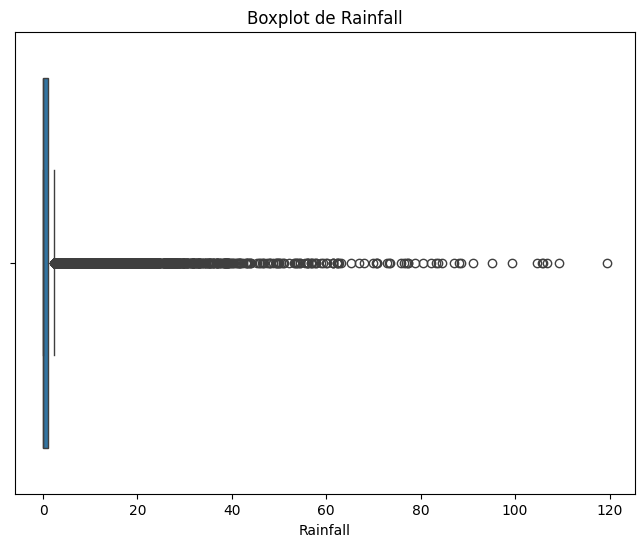

In [339]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Rainfall", data=df_train)
plt.title("Boxplot de Rainfall")
plt.show()

Veo una gran presencia de valores Outliers por lo que me inclino a usar la Mediana como medida para rellenar los valores nulos de la variable RainFall

In [340]:
# df_train
mediana_Rainfall_train = df_train.groupby('Date')['Rainfall'].median()
df_train['Rainfall'] = df_train.apply(lambda x: mediana_Rainfall_train[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)

# df_test
mediana_Rainfall_test = df_test.groupby('Date')['Rainfall'].median()
df_test['Rainfall'] = df_test.apply(lambda x: mediana_Rainfall_test[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3045500574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Rainfall'] = df_test.apply(lambda x: mediana_Rainfall_test[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)


---

### Evaporation

In [341]:
print(df_train["Evaporation"].isnull().sum())

1240


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


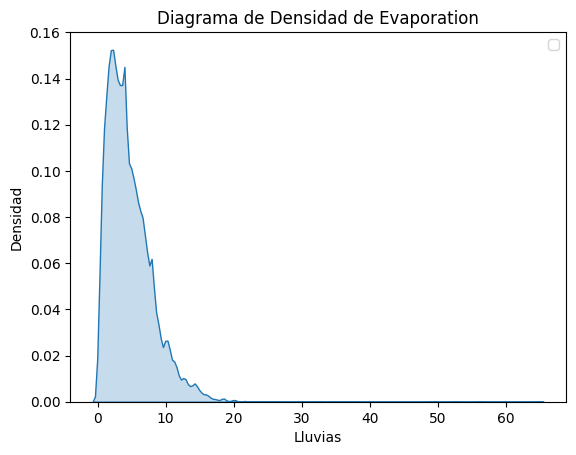

In [342]:
bandwidth = 0.5
sns.kdeplot(data=df_train['Evaporation'], fill=True, bw_adjust=bandwidth)
plt.title('Diagrama de Densidad de Evaporation')
plt.xlabel('Lluvias')
plt.ylabel('Densidad')
plt.legend()

Nuevamente observo una fuerte presencia de valores outliers por lo que voy a usar la **Mediana** para imputar valores faltantes.

In [343]:
# df_train
mediana_Evaporation_train = df_train.groupby('Date')['Evaporation'].median()
df_train['Evaporation'] = df_train.apply(lambda x: mediana_Evaporation_train[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)

# df_test
mediana_Evaporation_test = df_test.groupby('Date')['Evaporation'].median()
df_test['Evaporation'] = df_test.apply(lambda x: mediana_Evaporation_test[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\2678679043.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Evaporation'] = df_test.apply(lambda x: mediana_Evaporation_test[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)


---

### Sunshine

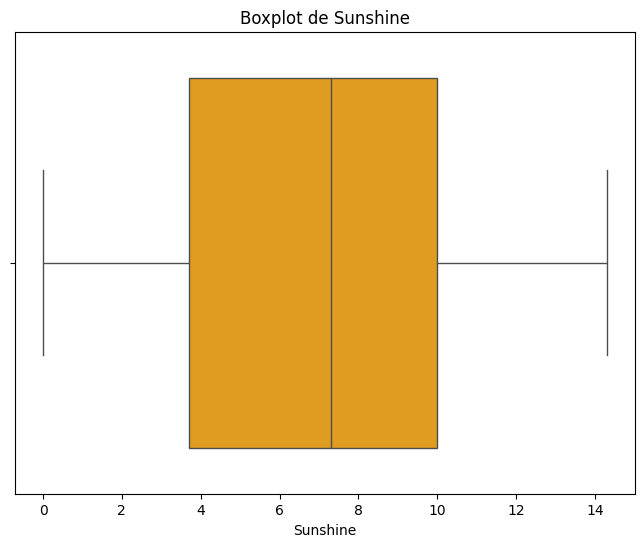

In [344]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sunshine", data=df_train, color="orange")
plt.title("Boxplot de Sunshine")
plt.show()

La distribucion de la variable Sunshine se ve bastante balanceada y sin presencia de outliers por lo que utilizo la **Media** para imputar a los valores nulos.

In [345]:
df_train["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)
df_test["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\2290878809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Sunshine"] = df_train.groupby(df_train["Date"].dt.day)["Sunshine"].transform(


In [346]:
# Extraigo el mes de la columna 'Date'
df_train['Month'] = df_train['Date'].dt.month
df_test['Month'] = df_test['Date'].dt.month

# Calcular la media de MinTemp por mes en df_train
media_Sunshine_mes_train = df_train.groupby('Month')['Sunshine'].mean()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\1681817379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Month'] = df_test['Date'].dt.month


In [347]:
# Imputar los valores nulos de Sunshine de df_test con la media por mes
# Sunshine
df_train['Sunshine'] = df_train['Sunshine'].fillna(df_train['Month'].map(media_Sunshine_mes_train))
df_test['Sunshine'] = df_test['Sunshine'].fillna(df_test['Month'].map(media_Sunshine_mes_train))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\2389355344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sunshine'] = df_test['Sunshine'].fillna(df_test['Month'].map(media_Sunshine_mes_train))


---

### WindGustDir, WindDir9am y WindDir3pm

In [348]:
print(df_train["WindGustDir"].isnull().sum())
print(df_train["WindDir9am"].isnull().sum())
print(df_train["WindDir3pm"].isnull().sum())

1482
1149
338


In [349]:
# Registros donde las 3 variables son Nulas.
df_train[
    df_train["WindGustDir"].isnull()
    & df_train["WindDir9am"].isnull()
    & df_train["WindDir3pm"].isnull()
]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month
7867,2014-03-25,11.0,27.8,0.0,2.8,6.859300,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,15.8,25.9,No,No,0.0,3
7990,2014-07-26,NaN,NaN,0.0,3.4,6.733883,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,No,No,0.0,7
7991,2014-07-27,NaN,18.9,0.0,4.1,6.682633,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,No,No,0.0,7
7997,2014-08-02,NaN,13.7,0.0,5.4,6.872711,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,No,No,0.0,8
8019,2014-08-24,8.9,22.2,0.0,3.8,6.688376,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,15.2,21.2,No,No,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101491,2014-08-31,9.2,20.0,0.0,3.6,0.500000,NaN,NaN,NaN,NaN,...,1014.1,1009.9,7.0,8.0,13.8,18.5,No,Yes,4.6,8
101526,2014-10-05,8.7,17.8,0.0,6.0,8.900000,NaN,NaN,NaN,NaN,...,1018.3,1015.7,7.0,1.0,12.9,17.1,No,Yes,1.4,10
101553,2014-11-01,8.9,14.4,3.8,10.2,10.400000,NaN,83.0,NaN,NaN,...,1008.4,1013.6,5.0,6.0,12.5,13.6,Yes,Yes,1.2,11
101561,2014-11-09,6.1,20.2,1.2,2.6,11.900000,NaN,NaN,NaN,NaN,...,1025.1,1022.9,5.0,1.0,14.2,19.0,Yes,No,0.0,11


Relleno los valores faltantes para cada variable utilizando la **Moda** de cada dia.

In [350]:
# df_train
df_train["WindGustDir"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir9am"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_train["WindDir3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindDir3pm"
].transform(lambda x: x.fillna(x.mode().iloc[0]))

# df_test
df_test["WindGustDir"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustDir"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_test["WindDir9am"] = df_test.groupby(df_test["Date"].dt.day)["WindDir9am"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)
df_test["WindDir3pm"] = df_test.groupby(df_test["Date"].dt.day)["WindDir3pm"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\132721561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustDir"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\132721561.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindDir9am"] = df_test.groupby(df_test["Date"].dt.day)["WindDir9am"].transform(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\132721561.py:19: SettingWithCopyWarning: 
A value is trying to be set

In [351]:
print(df_train["WindGustDir"].isnull().sum())
print(df_train["WindDir9am"].isnull().sum())
print(df_train["WindDir3pm"].isnull().sum())

0
0
0


---

### WindGustSpeed, WindSpeed9am y WindSpeed3pm

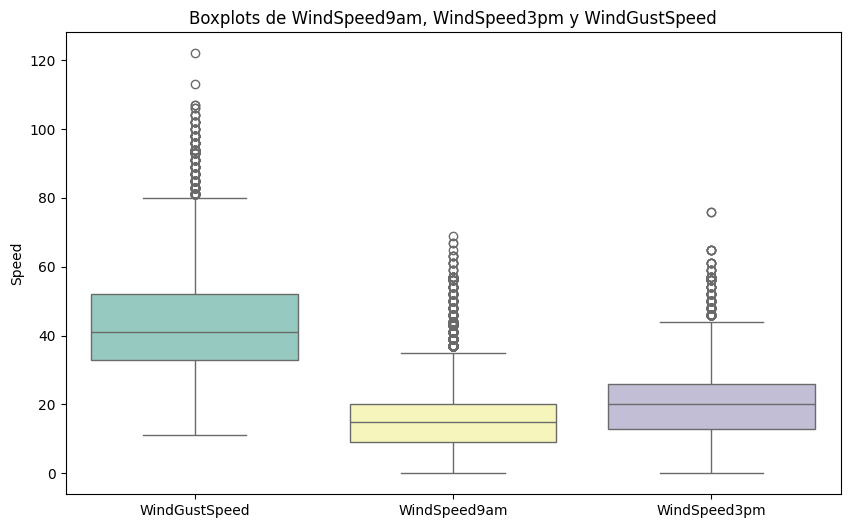

In [352]:
data_to_plot = df_train[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, palette="Set3")
plt.title("Boxplots de WindSpeed9am, WindSpeed3pm y WindGustSpeed")
plt.ylabel("Speed")
plt.show()

Voy a imputar los valores nulos utilizando la **Mediana** por dia.

In [353]:
df_train["WindGustSpeed"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed9am"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_train["WindSpeed3pm"] = df_train.groupby(df_train["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))


df_test["WindGustSpeed"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))
df_test["WindSpeed9am"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindSpeed9am"
].transform(lambda x: x.fillna(x.median()))
df_test["WindSpeed3pm"] = df_test.groupby(df_test["Date"].dt.day)[
    "WindGustSpeed"
].transform(lambda x: x.fillna(x.median()))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3221081509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindGustSpeed"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3221081509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["WindSpeed9am"] = df_test.groupby(df_test["Date"].dt.day)[
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3221081509.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [354]:
print(df_train["WindGustSpeed"].isnull().sum())
print(df_train["WindSpeed9am"].isnull().sum())
print(df_train["WindSpeed3pm"].isnull().sum())

0
0
0


---

### Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, Pressure9am y Pressure3pm

In [355]:
print(df_train["Humidity9am"].isnull().sum())
print(df_train["Humidity3pm"].isnull().sum())
print(df_train["Cloud9am"].isnull().sum())
print(df_train["Cloud3pm"].isnull().sum())
print(df_train["Pressure9am"].isnull().sum())
print(df_train["Pressure3pm"].isnull().sum())

265
222
4267
4527
279
273


#### Humidity9am y Humidity3pm

Imputo los valores de **Humidity9am** y **Humidity3pm** con la mediana por fecha

In [356]:
# df_train
mediana_Humidity9am = df_train.groupby('Date')['Humidity9am'].median()
df_train['Humidity9am'] = df_train.apply(lambda x: mediana_Humidity9am[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)

mediana_Humidity3pm = df_train.groupby('Date')['Humidity3pm'].median()
df_train['Humidity3pm'] = df_train.apply(lambda x: mediana_Humidity3pm[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidity3pm'], axis=1)

# df_test
mediana_Humidity9am_test = df_test.groupby('Date')['Humidity9am'].median()
df_test['Humidity9am'] = df_test.apply(lambda x: mediana_Humidity9am_test[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)

mediana_Humidity3pm_test = df_test.groupby('Date')['Humidity3pm'].median()
df_test['Humidity3pm'] = df_test.apply(lambda x: mediana_Humidity3pm_test[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidity3pm'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\181873114.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Humidity9am'] = df_test.apply(lambda x: mediana_Humidity9am_test[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\181873114.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Humidity3pm'] = df_test.apply(lambda x: mediana_Humidity3pm_test[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidit

In [357]:
print(df_train["Humidity9am"].isnull().sum())
print(df_train["Humidity3pm"].isnull().sum())

0
0


#### Cloud9am y Cloud3pm

Hago lo mismo con Cloud9am y Cloud3pm, usando las mediana por dia para imputar valores faltantes.

In [358]:
# df_train
mediana_Cloud9am = df_train.groupby('Date')['Cloud9am'].median()
df_train['Cloud9am'] = df_train.apply(lambda x: mediana_Cloud9am[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)

mediana_Cloud3pm = df_train.groupby('Date')['Cloud3pm'].median()
df_train['Cloud3pm'] = df_train.apply(lambda x: mediana_Cloud3pm[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)

# df_test
mediana_Cloud9am_test = df_test.groupby('Date')['Cloud9am'].median()
df_test['Cloud9am'] = df_test.apply(lambda x: mediana_Cloud9am_test[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)

mediana_Cloud3pm_test = df_test.groupby('Date')['Cloud3pm'].median()
df_test['Cloud3pm'] = df_test.apply(lambda x: mediana_Cloud3pm_test[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3635661414.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cloud9am'] = df_test.apply(lambda x: mediana_Cloud9am_test[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3635661414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cloud3pm'] = df_test.apply(lambda x: mediana_Cloud3pm_test[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)


In [359]:
print(df_train["Cloud9am"].isnull().sum())
print(df_train["Cloud3pm"].isnull().sum())

0
0


#### Pressure9am y Pressure3pm

Repito la misma metodologia para las variables Pressure9am y Pressure3pm.

In [360]:
# df_train
mediana_Pressure9am = df_train.groupby('Date')['Pressure9am'].median()
df_train['Pressure9am'] = df_train.apply(lambda x: mediana_Pressure9am[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)

mediana_Pressure3pm = df_train.groupby('Date')['Pressure3pm'].median()
df_train['Pressure3pm'] = df_train.apply(lambda x: mediana_Pressure3pm[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Pressure3pm'], axis=1)

# df_test
mediana_Pressure9am_test = df_test.groupby('Date')['Pressure9am'].median()
df_test['Pressure9am'] = df_test.apply(lambda x: mediana_Pressure9am_test[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)

mediana_Pressure3pm_test = df_test.groupby('Date')['Pressure3pm'].median()
df_test['Pressure3pm'] = df_test.apply(lambda x: mediana_Pressure3pm_test[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Pressure3pm'], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3146905465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Pressure9am'] = df_test.apply(lambda x: mediana_Pressure9am_test[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\3146905465.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Pressure3pm'] = df_test.apply(lambda x: mediana_Pressure3pm_test[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Press

In [361]:
print(df_train["Pressure9am"].isnull().sum())
print(df_train["Pressure3pm"].isnull().sum())

0
0


---

### MinTemp, MaxTemp, Temp9am y Temp3pm

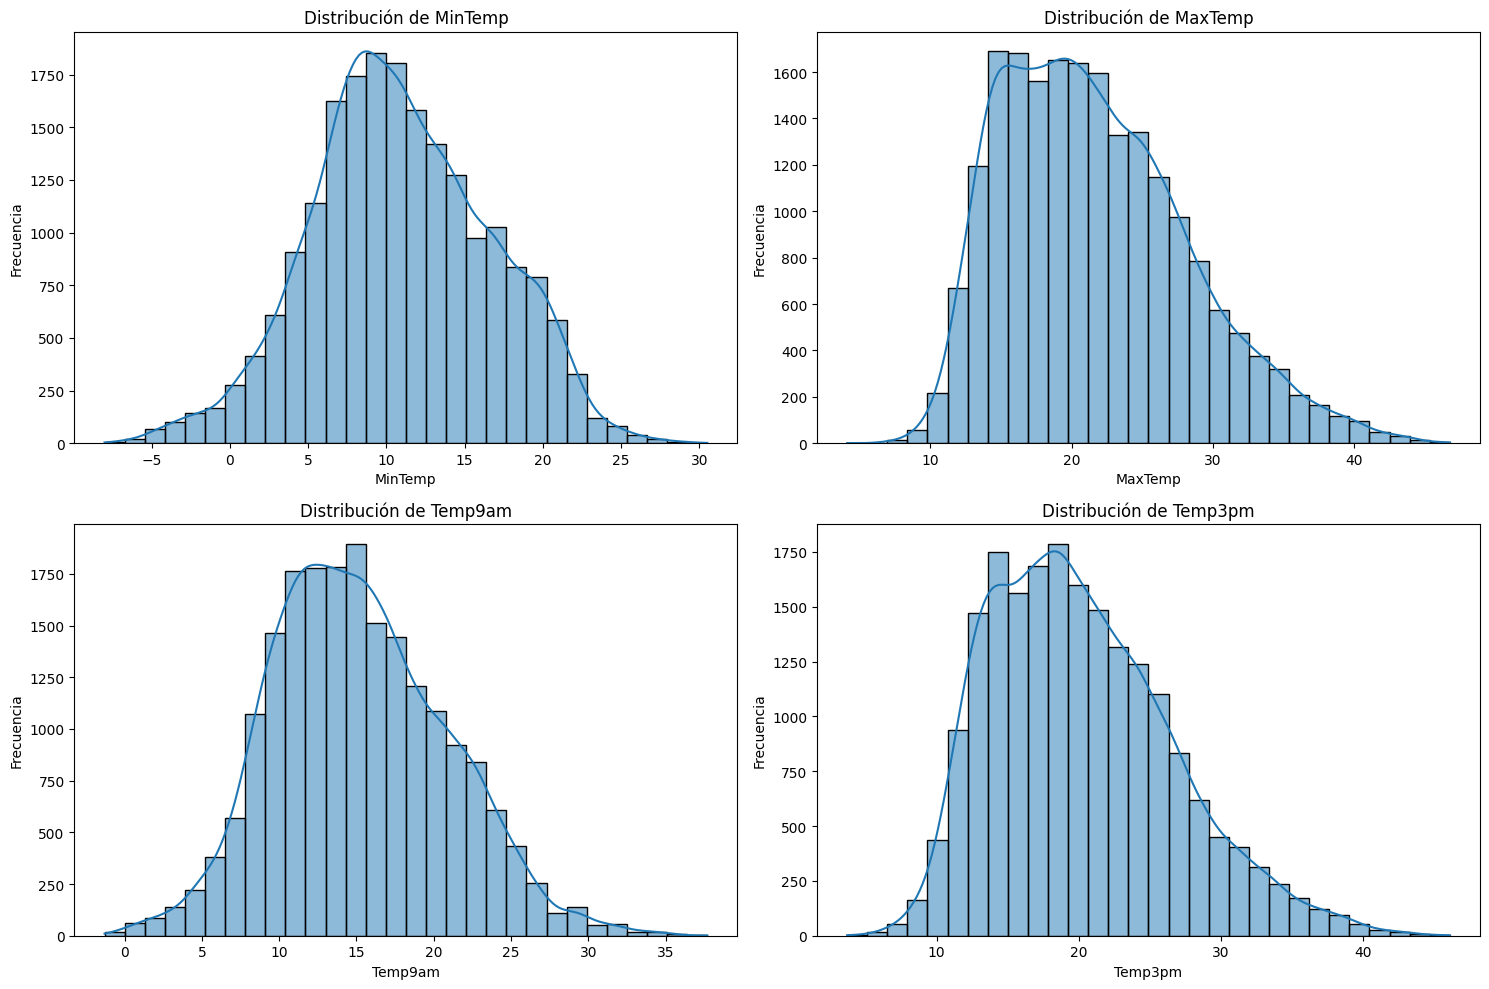

In [362]:
# Seleccionar algunas columnas para analizar
columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

# Crear la figura y los subgráficos
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Observo una distribucion bastante normal en las 4 variables, por lo que en este caso voy a optar por imputar los valores faltantes utilizando la **Media**.

Para eso, voy a calcular la media de cada variable por mes en mi df_train y luego usar estos valores para imputar los valores faltantes tanto en mi df_train como df_test.

In [363]:
# Extraigo el mes de la columna 'Date'
df_train['Month'] = df_train['Date'].dt.month
df_test['Month'] = df_test['Date'].dt.month

# Calcular la media de MinTemp por mes en df_train
media_MinTemp_mes_train = df_train.groupby('Month')['MinTemp'].mean()
media_MaxTemp_mes_train = df_train.groupby('Month')['MaxTemp'].mean()
media_Temp9am_mes_train = df_train.groupby('Month')['Temp9am'].mean()
media_Temp3pm_mes_train = df_train.groupby('Month')['Temp3pm'].mean()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\530622026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Month'] = df_test['Date'].dt.month


In [364]:
# Imputar los valores nulos de MinTemp de df_test con la media por mes
# MinTemp
df_train['MinTemp'] = df_train['MinTemp'].fillna(df_train['Month'].map(media_MinTemp_mes_train))
df_test['MinTemp'] = df_test['MinTemp'].fillna(df_test['Month'].map(media_MinTemp_mes_train))

# MaxTemp
df_train['MaxTemp'] = df_train['MaxTemp'].fillna(df_train['Month'].map(media_MaxTemp_mes_train))
df_test['MaxTemp'] = df_test['MaxTemp'].fillna(df_test['Month'].map(media_MaxTemp_mes_train))

# Temp9am
df_train['Temp9am'] = df_train['Temp9am'].fillna(df_train['Month'].map(media_Temp9am_mes_train))
df_test['Temp9am'] = df_test['Temp9am'].fillna(df_test['Month'].map(media_Temp9am_mes_train))

# Temp3pm
df_train['Temp3pm'] = df_train['Temp3pm'].fillna(df_train['Month'].map(media_Temp3pm_mes_train))
df_test['Temp3pm'] = df_test['Temp3pm'].fillna(df_test['Month'].map(media_Temp3pm_mes_train))

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\4286069745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MinTemp'] = df_test['MinTemp'].fillna(df_test['Month'].map(media_MinTemp_mes_train))
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\4286069745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MaxTemp'] = df_test['MaxTemp'].fillna(df_test['Month'].map(media_MaxTemp_mes_train))
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\4286069745.py:12: SettingWithCopyWar

In [365]:
# Elimino la columna 'Month' porque ya no la voy a usar mas
df_train.drop(columns=['Month'], inplace=True)
df_test.drop(columns=['Month'], inplace=True)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\1517116963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Month'], inplace=True)


---

### RainToday y RainTomorrow

In [366]:
print(df_train["RainToday"].isna().sum())
print(df_train["RainTomorrow"].isna().sum())
print(df_train["RainfallTomorrow"].isna().sum())

162
0
0


Imputo los valores de RainToday con la moda porque es una variable categorica.

In [367]:
# df_train
moda_RainToday_train = df_train.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_train["RainToday"] = df_train["RainToday"].fillna(moda_RainToday_train)

moda_RainToday_test = df_test.groupby("Date")["RainToday"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainToday"] = df_test["RainToday"].fillna(moda_RainToday_test)

# df_test
moda_RainTomorrow_test = df_test.groupby("Date")["RainTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainTomorrow"] = df_test["RainTomorrow"].fillna(moda_RainTomorrow_test)

moda_RainfallTomorrow_test = df_test.groupby("Date")["RainfallTomorrow"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
df_test["RainfallTomorrow"] = df_test["RainfallTomorrow"].fillna(
    moda_RainfallTomorrow_test
)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\1132428338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainToday"] = df_test["RainToday"].fillna(moda_RainToday_test)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\1132428338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["RainTomorrow"] = df_test["RainTomorrow"].fillna(moda_RainTomorrow_test)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_16720\1132428338.py:21: SettingWithCopyWarning: 
A value is trying to be se

---

### Comprobacion final

In [368]:
df_train.isna().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

In [369]:
df_test.isna().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64